In [424]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams['figure.figsize']=(8,10)

print('successfully imported!!!')

successfully imported!!!


In [425]:
df=pd.read_csv('Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [426]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [427]:
df.shape

(13320, 9)

In [428]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [429]:
df2=df.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [430]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [431]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [432]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-432-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [433]:
df3.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [434]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [435]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [436]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [437]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [438]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [439]:
def convert_sqrt_to_num(x):
    result=x.split('-')
    if len(result)==2:
        return (float(result[0])+float(result[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [440]:
df4=df3.copy()

In [441]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqrt_to_num)

In [442]:
df4.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [443]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [444]:
df5=df4.copy()

In [445]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [446]:
df5.location.nunique()

1304

In [447]:
df5['location']=df5['location'].apply(lambda x: x.strip() )

In [448]:
locations= df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(locations)

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64


In [449]:
locations_less_than_10=locations[locations<=10]
print(locations_less_than_10)

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64


In [450]:
df5['location']=df['location'].apply(lambda x: 'others' if x in locations_less_than_10 else x)

In [451]:
len(df5['location'].unique())

283

In [452]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [453]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [454]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,value in df.groupby('location'):
        m=np.mean(value.price_per_sqft)
        s=np.std(value.price_per_sqft)
        reduced_df=value[((value.price_per_sqft>=m-s) & (value.price_per_sqft<=m+s))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out  

In [455]:
df7=remove_pps_outliers(df6)
df7.shape

(10230, 7)

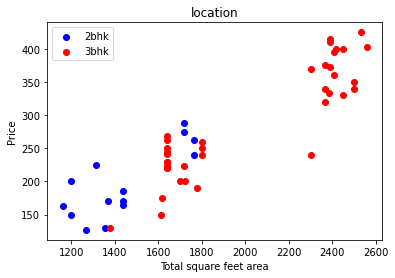

In [456]:
def scatter_plot(df,location):
    bhk2=df[((df.location==location) & (df.bhk==2))]
    bhk3=df[((df.location==location) & (df.bhk==3))]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3bhk')
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.title('location')
    plt.legend()
scatter_plot(df7,'Rajaji Nagar')

In [457]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stat={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stat=bhk_stat.get(bhk-1)
            if stat and stat['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stat['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [458]:
df8=remove_bhk_outlier(df7)
df8.shape

(7353, 7)

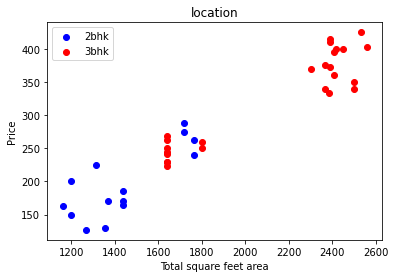

In [459]:
scatter_plot(df8,'Rajaji Nagar')

Text(0, 0.5, 'count')

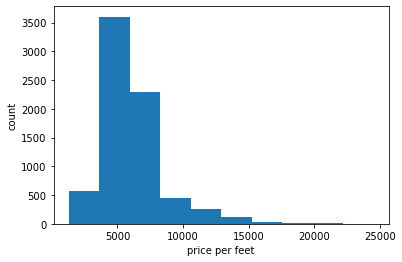

In [460]:
plt.hist(df8.price_per_sqft)
plt.xlabel('price per feet')
plt.ylabel('count')

Text(0, 0.5, 'count')

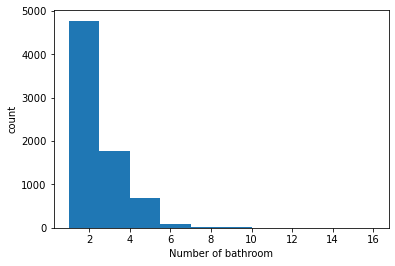

In [461]:
plt.hist(df8.bath)
plt.xlabel('Number of bathroom')
plt.ylabel('count')

In [462]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1658,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5276,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8456,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [463]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7275, 7)

In [464]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,Anekal,351.0,1.0,16.0,1
1,Banaswadi,527.0,1.0,35.0,1
2,Basavangudi,670.0,1.0,50.0,1
3,Devarabeesana Halli,1672.0,3.0,150.0,3
4,Devarabeesana Halli,1750.0,3.0,149.0,3


In [465]:
dummies=pd.get_dummies(df10.location)
dummies

,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Sector 1 HSR Layout,Thanisandra,...,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [466]:
df11=pd.concat([df10,dummies.drop('others',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,Anekal,351.0,1.0,16.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Banaswadi,527.0,1.0,35.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Basavangudi,670.0,1.0,50.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarabeesana Halli,1672.0,3.0,150.0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarabeesana Halli,1750.0,3.0,149.0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [467]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,351.0,1.0,16.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,527.0,1.0,35.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,670.0,1.0,50.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1672.0,3.0,150.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,149.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [468]:
df12.shape

(7275, 284)

In [469]:
x=df12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,351.0,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,527.0,1.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,670.0,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1672.0,3.0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
y=df12.price
y.head()

0     16.0
1     35.0
2     50.0
3    150.0
4    149.0
Name: price, dtype: float64

In [471]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [472]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8650696787137427

In [497]:
x.columns

Index(['total_sqft', 'bath', 'bhk', ' Anekal', ' Banaswadi', ' Basavangudi',
       ' Devarabeesana Halli', ' Devarachikkanahalli', ' Electronic City',
       ' Mysore Highway',
       ...
       'Vittasandra', 'Whietfield, ', 'Whitefield', 'Whitefield, ',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yemlur, Old Airport Road, ', 'Yeshwanthpur'],
      dtype='object', length=283)

In [501]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    input_value    =np.zeros(len(x.columns))
    input_value[0] =sqft
    input_value[1] =bath
    input_value[2] =bhk
    
    if loc_index >= 0:
        input_value[loc_index] = 1
        
    return lr.predict([input_value])[0]

In [502]:
predict_price('Banaswadi',1170,2,2)

61.559997409404886

In [503]:
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [504]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))